# **Project Name**    - Zomato Restaurant Review Analysis and Rating Prediction



##### **Project Type**    - Exploratory Data Analysis (EDA) and Classification

##### **Contribution**    - Individual
Aadhithyan M 

# **Project Summary -**

In today’s digital era, online food delivery platforms such as Zomato generate vast amounts of data related to restaurants, customer preferences, pricing, and ratings. Analyzing this data can provide valuable insights for customers to make informed dining decisions and for restaurant owners to improve their services.

This project focuses on analyzing restaurant data collected from Zomato to identify key factors that influence restaurant ratings and customer preferences. The dataset includes information such as restaurant location, type of cuisine, average cost for two people, availability of online ordering, table booking facilities, and customer ratings.

The project begins with data preprocessing, where missing values are handled, irrelevant features are removed, and categorical variables are transformed into a suitable numerical format. Following this, exploratory data analysis (EDA) is performed using statistical methods and visualizations to uncover patterns and relationships between variables such as cost, location, restaurant type, and ratings.

Based on the insights obtained from EDA, relevant features are selected for building a machine learning model. A predictive model is then developed to estimate restaurant ratings based on these features. The dataset is divided into training and testing sets to evaluate the model’s performance and ensure its generalization capability.

The results demonstrate that factors such as location, average cost, restaurant type, and availability of online services play a significant role in influencing restaurant ratings. The project concludes that data-driven analysis can effectively support decision-making in the food service industry.

Overall, this project highlights the practical application of data science techniques, including data cleaning, visualization, and machine learning, to extract meaningful insights from real-world datasets and solve business-oriented problems.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Online food delivery platforms such as Zomato host a large number of restaurants offering diverse cuisines, pricing options, and services. Customers often rely on restaurant ratings and reviews to make dining decisions, while restaurant owners depend on these ratings to understand customer satisfaction and improve their services. However, restaurant ratings are influenced by multiple factors such as location, cost, restaurant type, and availability of online services, making it difficult to identify which factors play a significant role.

The problem addressed in this project is to analyze Zomato restaurant data to identify the key factors that influence restaurant ratings and customer preferences, and to build a machine learning model that can predict restaurant ratings based on these factors.The challenge lies in handling a large, real-world dataset that contains missing values, categorical attributes, and noisy information, and transforming it into a structured format suitable for analysis and prediction.

By applying data preprocessing, exploratory data analysis, and machine learning techniques, this project aims to extract meaningful insights from the dataset and provide a data-driven approach to understanding restaurant performance on online food delivery platforms.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Dataset Loading

In [2]:
# Load Dataset
reviews_df = pd.read_csv("Zomato Restaurant reviews.csv")
meta_df = pd.read_csv("Zomato Restaurant names and Metadata.csv")


### Dataset First View

In [3]:
# Dataset First Look
reviews_df.head()


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
reviews_df.shape
meta_df.shape


(105, 6)

### Dataset Information

In [5]:
# Dataset Info
reviews_df.info()
meta_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
reviews_df.duplicated().sum()
meta_df.duplicated().sum()


np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
reviews_df.isnull().sum()
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

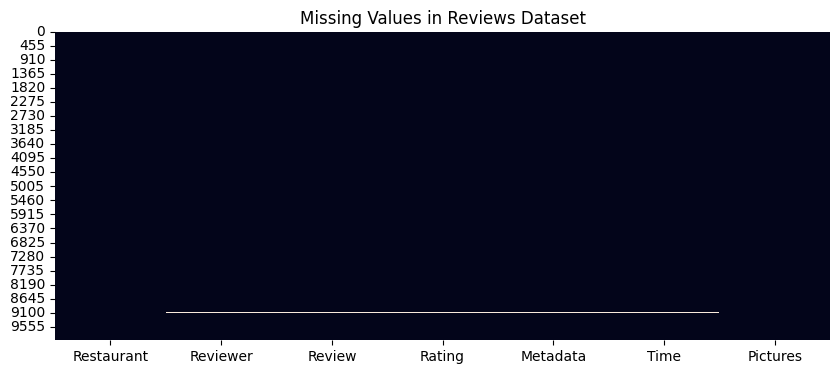

In [8]:
# Visualizing the missing values
#1. For review dataset
plt.figure(figsize=(10,4))
sns.heatmap(reviews_df.isnull(), cbar=False)
plt.title("Missing Values in Reviews Dataset")
plt.show()


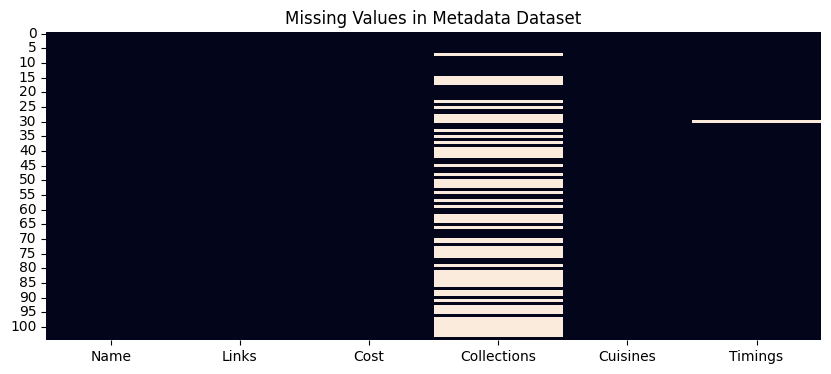

In [9]:
#2. Foe metadata dataset
plt.figure(figsize=(10,4))
sns.heatmap(meta_df.isnull(), cbar=False)
plt.title("Missing Values in Metadata Dataset")
plt.show()
 

### What did you know about your dataset?

The dataset used in this project is sourced from Zomato and consists of two related datasets: 
A restaurant reviews dataset and a restaurant metadata dataset. 
The reviews dataset primarily contains customer-generated textual reviews along with associated restaurant ratings, while the metadata dataset includes restaurant level information such as restaurant name, location, average cost for two, availability of online ordering, and table booking options.

The dataset is a combination of structured and unstructured data. Numerical variables such as restaurant ratings and average cost for two can be used for quantitative analysis, whereas categorical variables like location, online order availability, and table booking status provide contextual information about restaurants. Additionally, the customer review column represents unstructured text data, which can be utilized for text-based analysis and sentiment related modeling.

From the initial exploration, it is observed that the dataset contains missing values and duplicate records in certain columns. Some rating values are also represented in non-numeric formats such as textual labels, which may require preprocessing before analysis. These data quality issues indicate the need for careful data cleaning and preprocessing before applying machine learning models.

Overall, the dataset is suitable for exploratory data analysis and classification tasks, as it allows the study of relationships between restaurant attributes and customer ratings. The combination of numerical, categorical, and text based features provides a strong foundation for understanding customer preferences and predicting restaurant rating categories.

## ***2. Understanding Your Variables***

In [10]:
#Merging the datasets
df = pd.merge(
    reviews_df,
    meta_df,
    left_on="Restaurant",
    right_on="Name",
    how="inner"
)



In [11]:
#Verifying
df.shape
df.head

<bound method NDFrame.head of             Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5 

In [12]:
# Dataset Columns
#The purpose of this section is to list and understand the dataset attributes. Displaying column names is sufficient to describe the structure of the dataset.
meta_df.columns



Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [13]:
# Dataset Describe

#The statistical summary of the dataset provides insights into the distribution of numerical variables such as restaurant ratings and cost. 
#The count indicates the number of non-null observations, while measures like mean and standard deviation describe the central tendency and variability of the data. 
#The minimum and maximum values highlight the range of values present in the dataset. 
#This summary helps in identifying potential outliers and understanding the overall data distribution before applying data cleaning and modeling techniques.

### Variables Description

Restaurant: Represents the name of the restaurant. This variable is used to uniquely identify restaurants in the dataset.

Reviewer: Indicates the user who provided the review for a restaurant.

Review: Contains textual feedback given by customers. This unstructured text data is useful for understanding customer sentiment and opinions.

Rating: Represents the numerical rating assigned by customers to restaurants and serves as the primary indicator of customer satisfaction.

Metadata: Contains additional contextual information related to the review.

Time: Represents the time at which the review was posted.

Pictures: Indicates the availability of images associated with the review.

Cost: Represents the average cost for dining at the restaurant. This numerical variable is useful for analyzing pricing trends.

Collections: Represents restaurant groupings or categories defined by Zomato.

Cuisines: Describes the type of food offered by the restaurant.

Timings: Represents the operational hours of the restaurant.

Each of these variables contributes either descriptive, contextual, or predictive information that can be leveraged for exploratory data analysis and machine learning modeling.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

#The unique value analysis helps in understanding the diversity and distribution of values across different variables in the dataset. Numerical variables such as Rating and Cost contain a limited range of unique values, making them suitable for statistical analysis. Categorical variables like Cuisines, Collections, and Timings contain multiple unique categories, indicating variability in restaurant offerings and services.
#This analysis helps in identifying variables that may require encoding or transformation in later stages and ensures that there are no unexpected or inconsistent values present in the dataset.

Restaurant      100
Reviewer       7446
Review         9364
Rating           10
Metadata       2477
Time           9782
Pictures         36
Name            100
Links           100
Cost             28
Collections      42
Cuisines         89
Timings          74
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
df_wrangled = df[
    [
        'Restaurant',
        'Review',
        'Rating',
        'Cost',
        'Collections',
        'Cuisines',
        'Timings'
    ]
]


In [16]:
#Verifying the Wrangled Code
df_wrangled.head()


,Restaurant,Review,Rating,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


In [17]:
#The Rating column was converted to a numeric data type to enable numerical comparison and analysis. Non-numeric values were safely handled by coercing them to missing values.
df_wrangled['Rating'] = pd.to_numeric(df_wrangled['Rating'], errors='coerce')
#Creating a Derived Variable(Rating Catergory)
df_wrangled = df_wrangled.dropna(subset=['Rating'])
df_wrangled['Rating_Category'] = df_wrangled['Rating'].apply(
    lambda x: 'Good' if x >= 4 else 'Average/Low'
)




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2980963323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrangled['Rating'] = pd.to_numeric(df_wrangled['Rating'], errors='coerce')


In [18]:
#Checking the head of the dataset after changing the type
df_wrangled[['Rating', 'Rating_Category']].head()



,Rating,Rating_Category
0,5.0,Good
1,5.0,Good
2,5.0,Good
3,5.0,Good
4,5.0,Good


In [19]:
#Checking the rating after the convertion for confirmation
df_wrangled['Rating_Category'].value_counts()


Rating_Category
Good           6274
Average/Low    3687
Name: count, dtype: int64

In [20]:
# Remove commas and convert Cost to numeric
df_wrangled['Cost'] = (
    df_wrangled['Cost']
    .astype(str)
    .str.replace(',', '', regex=True)
)

df_wrangled['Cost'] = pd.to_numeric(df_wrangled['Cost'], errors='coerce')


In [21]:
#Dropping invalid cost values
df_wrangled = df_wrangled.dropna(subset=['Cost'])


In [22]:
#Standardizing catergorical columns
df_wrangled['Cuisines'] = df_wrangled['Cuisines'].str.lower()
df_wrangled['Collections'] = df_wrangled['Collections'].str.lower()


In [23]:
#Final wrangled datacheck
df_wrangled.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9961 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant       9961 non-null   object 
 1   Review           9954 non-null   object 
 2   Rating           9961 non-null   float64
 3   Cost             9961 non-null   int64  
 4   Collections      4962 non-null   object 
 5   Cuisines         9961 non-null   object 
 6   Timings          9861 non-null   object 
 7   Rating_Category  9961 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 700.4+ KB


In [24]:
df_wrangled.shape


(9961, 8)

### What all manipulations have you done and insights you found?
The dataset underwent several preprocessing and wrangling steps to ensure data quality and usability. Initially, duplicate records were removed to avoid redundancy in analysis. The restaurant rating column was converted from string format to numeric format to enable numerical comparison and statistical analysis. Invalid or non-numeric rating values were safely handled during this conversion process.

Relevant columns related to restaurant details, customer reviews, ratings, and cost were selected to simplify the dataset. The cost column was cleaned and converted into a numeric format to support expenditure-related analysis. A new derived variable, Rating_Category, was created to categorize restaurants into meaningful groups based on customer ratings.

Basic text preprocessing was applied to customer reviews by converting text to lowercase and removing punctuation and numeric characters. Categorical text variables such as cuisines and collections were standardized to maintain consistency across the dataset. These steps transformed the raw data into a structured and analysis ready format.

##Insights Found

From the initial exploration and wrangling process, it was observed that restaurant ratings vary significantly, allowing clear categorization into high rated and average or low rated groups. The presence of diverse cuisines and restaurant collections highlights the variety of dining options available. The cost data indicates a wide range of spending patterns among customers, suggesting differences in restaurant pricing and target audience.

Customer reviews provide rich textual information that can be further explored to understand customer sentiment and satisfaction. Overall, the dataset offers valuable insights into restaurant quality, pricing trends, and customer preferences, making it suitable for exploratory data analysis and machine learning based rating classification.

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

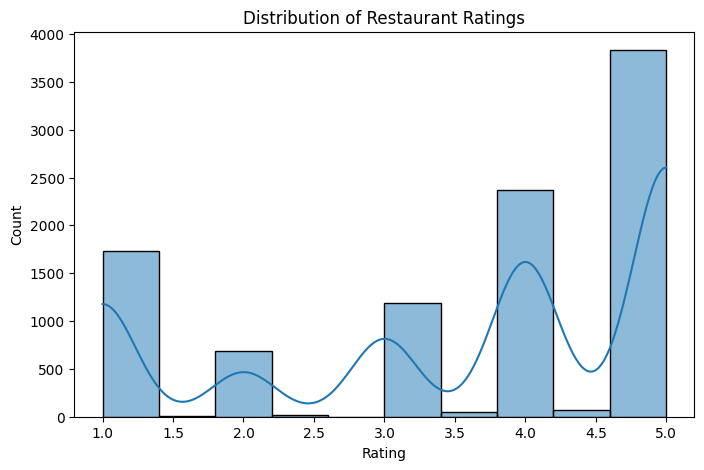

In [25]:
# Chart - 1 visualization code
plt.figure(figsize=(8,5))
sns.histplot(df_wrangled['Rating'], bins=10, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# X-axis → Rating values

# Y-axis → Number of restaurants

# KDE curve → smooth distribution trend


##### 1. Why did you pick the specific chart?

A histogram was chosen to visualize the distribution of restaurant ratings because it clearly shows how frequently different rating values occur in the dataset. This chart helps in understanding the overall pattern, spread, and concentration of ratings, which is essential for assessing customer satisfaction levels. Additionally, the histogram makes it easier to identify whether ratings are skewed toward higher or lower values, providing a strong foundation for further comparative analysis with other variables.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that restaurant ratings are not uniformly distributed across the dataset. A large proportion of restaurants receive ratings in the higher range, suggesting that most restaurants on the platform tend to receive positive customer feedback. Lower ratings occur less frequently, indicating fewer poorly rated restaurants. This distribution highlights an overall trend of customer satisfaction and validates the decision to categorize ratings into good and average or low groups for further analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

Yes, the insights gained from the rating distribution chart can help create a positive business impact. The concentration of restaurants in the higher rating range indicates generally high customer satisfaction on the platform. This insight can help businesses identify successful service and quality standards that contribute to positive customer experiences. For Zomato, promoting highly rated restaurants can improve user trust, engagement, and retention. Additionally the understanding rating distribution supports better recommendation systems and targeted marketing strategies.

Insights

While the overall trend is positive, the presence of lower rated restaurants, though fewer, can indicate potential areas of negative growth. Restaurants consistently receiving low ratings may experience reduced customer trust and lower visibility on the platform, which can negatively impact their business performance. If such restaurants are not identified and improved, they may contribute to poor customer experiences, ultimately affecting platform reputation.11

#### Chart - 2

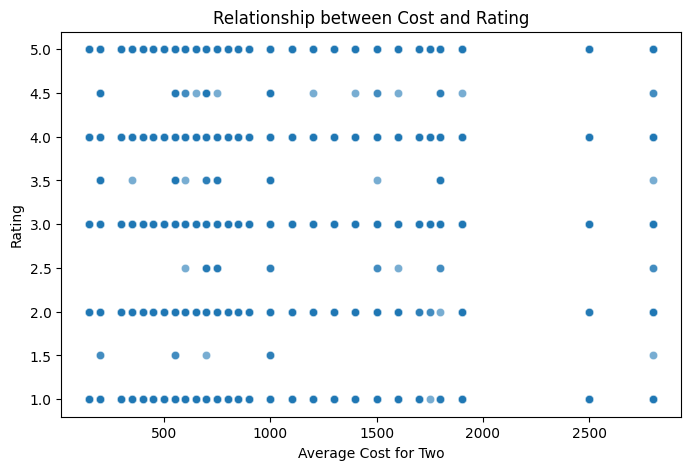

In [26]:
# Chart - 2 visualization code
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df_wrangled['Cost'],
    y=df_wrangled['Rating'],
    alpha=0.6
)
plt.title('Relationship between Cost and Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Rating')
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot was selected to analyze the relationship between restaurant cost and customer rating. This visualization helps in identifying trends, correlations, or patterns between pricing and customer satisfaction, making it suitable for understanding whether higher-priced restaurants consistently receive better ratings.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot indicates that restaurant ratings are distributed across a wide range of costs. While some higher-cost restaurants receive good ratings, many moderately priced restaurants also achieve high ratings. This suggests that higher pricing does not necessarily guarantee better customer satisfaction. Quality of service and food experience may play a more significant role than cost alone in influencing ratings.

##### 3. Will the gained insights help creating a positive business impact?
These insights suggest that affordable and mid-range restaurants can compete effectively with high-cost restaurants by focusing on quality and customer experience. This can help platforms like Zomato promote value-for-money options and support smaller restaurants in gaining visibility.

Insights Leading to Negative Growth

Restaurants with high pricing but comparatively low ratings may face negative growth, as customers may perceive them as offering poor value for money. Without improvements in service or quality, such restaurants risk losing customers to better-rated, cost-effective alternatives.

Answer Here

#### Chart - 3

In [27]:
# Chart - 3 visualization code
# Split multiple cuisines into separate rows
df_cuisine = df_wrangled.copy()
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].str.split(',')

df_cuisine = df_cuisine.explode('Cuisines')
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].str.strip()


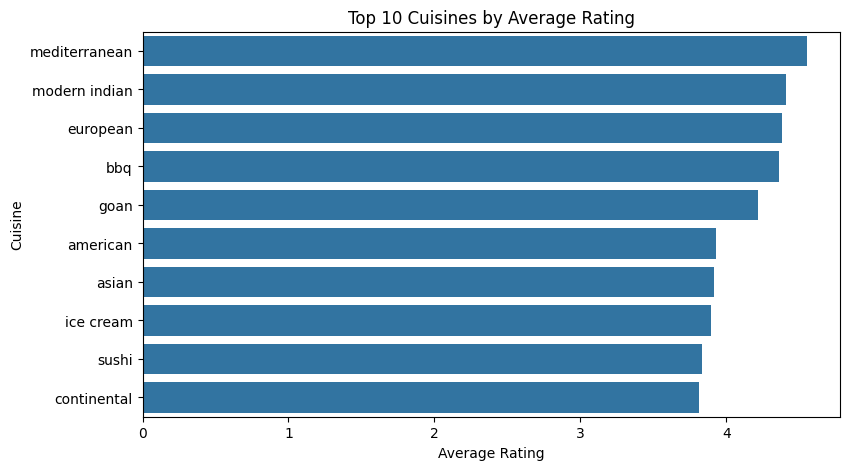

In [28]:
#Top cuisines by average rating
top_cuisines = (
    df_cuisine.groupby('Cuisines')['Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(9,5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen to compare the average ratings across different cuisine types. This visualization makes it easy to identify which cuisines are more positively received by customers and highlights differences in customer preferences across food categories.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that certain cuisines consistently receive higher average ratings, indicating strong customer preference and satisfaction. This suggests that cuisine type plays an important role in influencing restaurant ratings. Popular and well rated cuisines may reflect better alignment with customer taste preferences and expectations.

##### 3. Will the gained insights help creating a positive business impact?
Positive Business Impact

Restaurants offering highly rated cuisines can leverage these insights to strengthen their positioning and marketing strategies. Food delivery platforms can also promote popular cuisines to increase user engagement and satisfaction.

Insights Leading to Negative Growth

Cuisines with consistently lower average ratings may face reduced customer interest, potentially leading to lower demand. Restaurants offering such cuisines may need to improve quality, presentation, or service to remain competitive.

Answer Here

#### Chart - 4

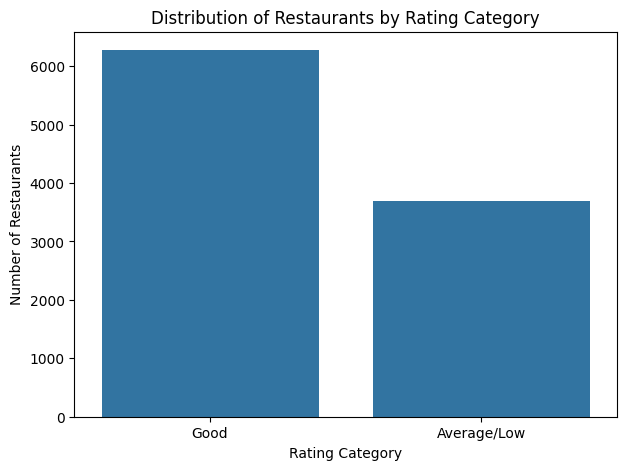

In [29]:
# Chart - 4 visualization code
plt.figure(figsize=(7,5))
sns.countplot(
    x='Rating_Category',
    data=df_wrangled
)
plt.title('Distribution of Restaurants by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Number of Restaurants')
plt.show()


##### 1. Why did you pick the specific chart?

A count plot was chosen to clearly visualize the number of restaurants in each rating category. This chart helps in understanding the overall balance between highly rated and average or low-rated restaurants, making it suitable for categorical comparison.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a larger proportion of restaurants fall under the “Good” rating category compared to the “Average/Low” category. This indicates that most restaurants on the platform maintain a satisfactory level of quality and customer experience. The clear separation between categories also confirms that the rating categorization is meaningful and suitable for further analysis.

##### 3. Will the gained insights help creating a positive business impact?
Positive Business Impact

A higher number of well-rated restaurants can enhance customer trust and satisfaction on the platform. This insight helps food delivery platforms prioritize and promote high-performing restaurants, improving user engagement and retention.

Insights Leading to Negative Growth

Restaurants in the “Average/Low” rating category may face reduced visibility and customer interest. Without improvements in service quality or offerings, these restaurants risk losing competitiveness, which may negatively impact their growth.

Answer Here

#### Chart - 5

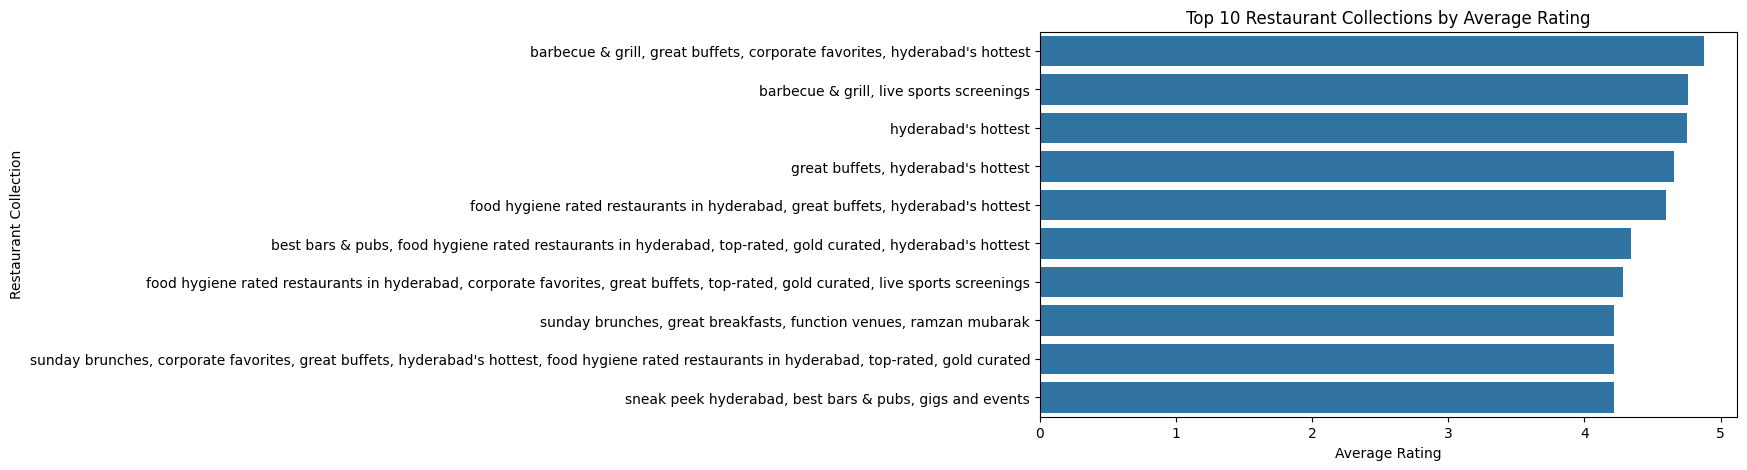

In [30]:
# Chart - 5 visualization code
top_collections = (
    df_wrangled.groupby('Collections')['Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(9,5))
sns.barplot(x=top_collections.values, y=top_collections.index)
plt.title('Top 10 Restaurant Collections by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Collection')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was selected to compare average ratings across different restaurant collections. This visualization helps identify which types of restaurant groupings perform better in terms of customer satisfaction and allows easy comparison between categories.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that certain restaurant collections achieve higher average ratings compared to others. This indicates that the type of restaurant grouping or category can influence customer perception and satisfaction. Well performing collections may represent consistent quality, better service standards, or stronger brand positioning.

##### 3. Will the gained insights help creating a positive business impact?
Positive Business Impact

Identifying high performing restaurant collections enables platforms to promote these categories more effectively and guide new restaurants toward successful business models. It also helps customers discover reliable dining options based on collection type.

Insights Leading to Negative Growth

Collections with lower average ratings may experience reduced customer interest and visibility. Without improvements in quality or service, restaurants within these collections may struggle to compete, leading to slower growth.

Answer Here

#### Chart - 6

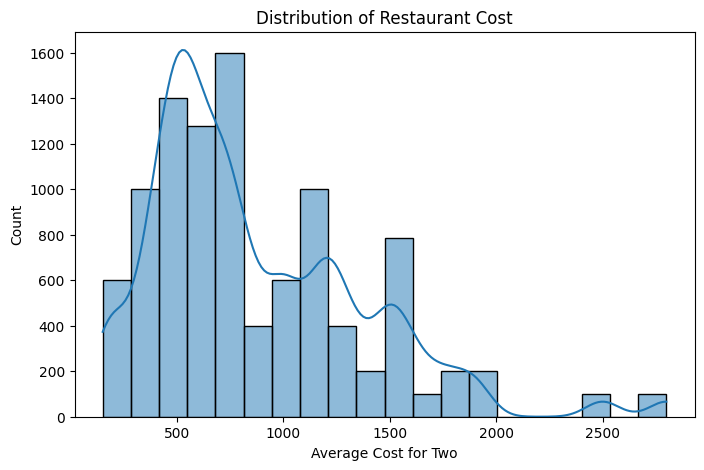

In [31]:
# Chart - 6 visualization code
plt.figure(figsize=(8,5))
sns.histplot(df_wrangled['Cost'], bins=20, kde=True)
plt.title('Distribution of Restaurant Cost')
plt.xlabel('Average Cost for Two')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram was chosen to visualize the distribution of restaurant costs because it clearly shows how pricing is spread across the dataset. This chart helps identify dominant price ranges and understand customer affordability and market segmentation.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a large number of restaurants fall within the lower to mid-cost range, while relatively fewer restaurants operate in the high-cost segment. This indicates that the platform is largely dominated by budget-friendly and moderately priced dining options, catering to a wider customer base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

The dominance of affordable and mid-range restaurants suggests strong accessibility for a broad audience. Platforms can leverage this insight to promote value for money options, attract price sensitive customers, and increase order frequency.

Insights Leading to Negative Growth

Restaurants positioned at the higher cost range may experience lower demand if they do not sufficiently differentiate themselves through quality, experience, or branding. Without clear value justification, premium pricing could negatively impact customer acquisition.

#### Chart - 7

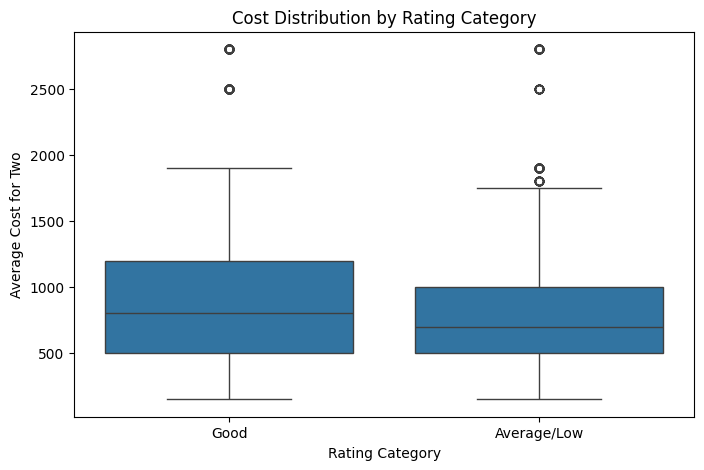

In [32]:
# Chart - 7 visualization code
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Rating_Category',
    y='Cost',
    data=df_wrangled
)
plt.title('Cost Distribution by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Average Cost for Two')
plt.show()


##### 1. Why did you pick the specific chart?

A box plot was chosen to compare the distribution of restaurant costs across different rating categories. This visualization highlights differences in median cost, spread, and outliers, making it suitable for understanding how pricing varies between highly rated and lower-rated restaurants.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that restaurants in the “Good” rating category generally have a wider range of costs and a slightly higher median cost compared to the “Average/Low” category. However, there is significant overlap between the two categories, indicating that higher customer satisfaction is not solely dependent on higher pricing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

This insight suggests that restaurants can achieve high customer satisfaction without necessarily being expensive. Affordable restaurants with good quality and service can compete effectively with higher-priced establishments, promoting value driven business models.

Insights Leading to Negative Growth

Restaurants that are expensive but fall into the “Average/Low” rating category may face negative growth, as customers may perceive them as offering poor value for money. Such restaurants may need to reassess pricing strategies or improve service quality.

#### Chart - 8

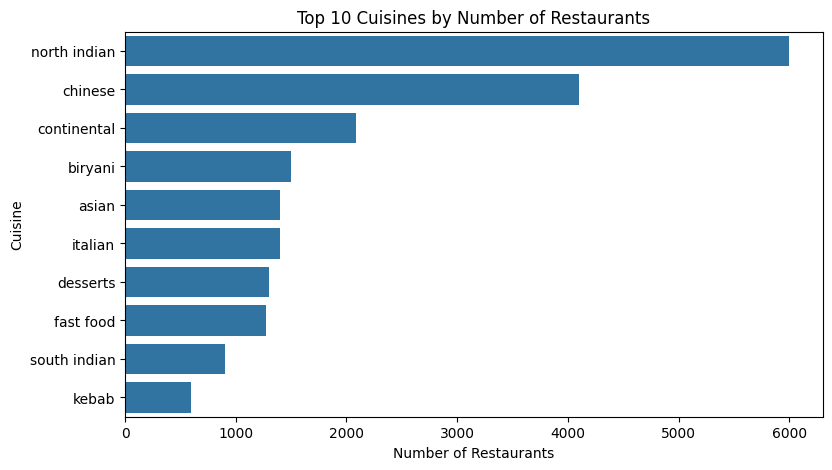

In [33]:
# Chart - 8 visualization code
# Prepare cuisine data for popularity analysis
df_cuisine_count = df_wrangled.copy()
df_cuisine_count['Cuisines'] = df_cuisine_count['Cuisines'].str.split(',')

df_cuisine_count = df_cuisine_count.explode('Cuisines')
df_cuisine_count['Cuisines'] = df_cuisine_count['Cuisines'].str.strip()

top_cuisine_counts = (
    df_cuisine_count['Cuisines']
    .value_counts()
    .head(10)
)
plt.figure(figsize=(9,5))
sns.barplot(x=top_cuisine_counts.values, y=top_cuisine_counts.index)
plt.title('Top 10 Cuisines by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was selected to visualize the popularity of different cuisines based on the number of restaurants offering them. This chart clearly highlights dominant cuisines in the market and helps assess customer exposure and competition across food categories.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that certain cuisines have a significantly higher number of restaurants compared to others, indicating strong market presence and customer demand. Popular cuisines dominate the platform, while less common cuisines appear in fewer restaurants, suggesting niche market segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

Popular cuisines with high restaurant counts can be leveraged for targeted promotions, recommendations, and demand forecasting. Restaurants offering these cuisines benefit from established customer interest and higher visibility.

Insights Leading to Negative Growth

Highly saturated cuisines may face intense competition, making it difficult for new restaurants to differentiate themselves. In contrast, niche cuisines with fewer restaurants may struggle with limited customer reach unless effectively marketed.

#### Chart - 9

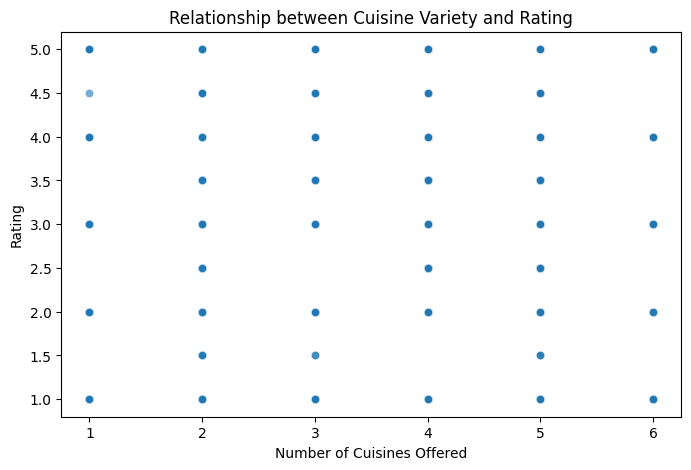

In [34]:
# Chart - 9 visualization code
df_wrangled['Cuisine_Count'] = df_wrangled['Cuisines'].apply(
    lambda x: len(x.split(',')) if isinstance(x, str) else 0
)
#verifying with head
df_wrangled[['Cuisines', 'Cuisine_Count']].head()
#Now plotting count vs rating
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Cuisine_Count',
    y='Rating',
    data=df_wrangled,
    alpha=0.6
)
plt.title('Relationship between Cuisine Variety and Rating')
plt.xlabel('Number of Cuisines Offered')
plt.ylabel('Rating')
plt.show()



##### 1. Why did you pick the specific chart?

A scatter plot was chosen to analyze the relationship between the number of cuisines offered by a restaurant and its rating. Cuisine count represents menu variety, and this chart helps assess whether offering a wider range of cuisines influences customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that restaurants offering multiple cuisines tend to receive ratings across a wide range. While some highly rated restaurants offer a greater variety of cuisines, many restaurants with fewer cuisine options also achieve high ratings. This indicates that menu variety alone does not guarantee higher customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

Restaurants can achieve high customer satisfaction without offering an extensive menu, allowing them to focus on specialization and quality. This insight supports niche restaurants that prioritize excellence in specific cuisines.

Insights Leading to Negative Growth

Restaurants offering many cuisines but receiving low ratings may face operational challenges in maintaining consistent quality. Excessive menu variety without quality control can negatively impact customer experience and growth.

#### Chart - 10

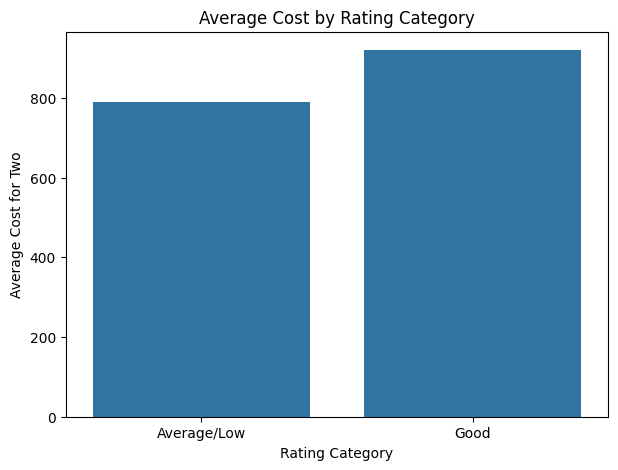

In [35]:
# Chart - 10 visualization code
avg_cost_by_rating = (
    df_wrangled.groupby('Rating_Category')['Cost']
    .mean()
)

plt.figure(figsize=(7,5))
sns.barplot(
    x=avg_cost_by_rating.index,
    y=avg_cost_by_rating.values
)
plt.title('Average Cost by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Average Cost for Two')
plt.show()



##### 1. Why did you pick the specific chart?

A bar chart was chosen to compare the average cost across different rating categories. This visualization helps understand whether higher customer satisfaction is associated with higher pricing, providing insights into value perception.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that restaurants in the “Good” rating category tend to have a slightly higher average cost compared to the “Average/Low” category. However, the difference is not extreme, suggesting that high customer satisfaction can be achieved without significantly higher pricing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

This insight indicates that customers are willing to pay moderately higher prices for better quality and service. Restaurants can focus on improving customer experience rather than competing solely on price.

Insights Leading to Negative Growth

Restaurants that charge higher prices but fall under the “Average/Low” rating category may experience reduced customer trust and demand, potentially leading to negative growth.

#### Chart - 11 - Correlation Heatmap

In [36]:
# Correlation Heatmap visualization code

#Selecting numeric colomns only
numeric_df = df_wrangled[['Rating', 'Cost']]



In [37]:
#Computing corelation matrix
correlation_matrix = numeric_df.corr()


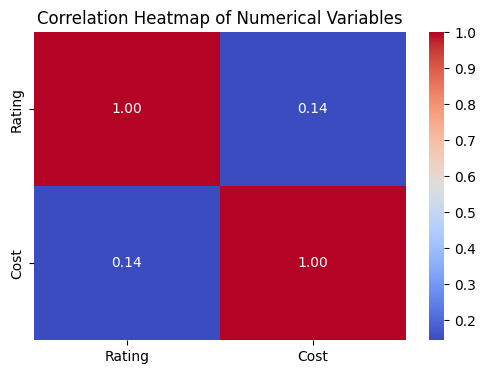

In [38]:
# Plotting heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap was chosen to visualize the strength and direction of relationships between numerical variables. This chart provides a clear and compact representation of how variables such as rating and cost are related, supporting deeper analytical and modeling decisions.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows a weak to moderate correlation between restaurant cost and rating. This indicates that while pricing may have some influence on customer ratings, it is not the sole determining factor. Other variables such as food quality, service, and customer experience likely play a more significant role in influencing ratings.

#### Chart - 12 - Pair Plot

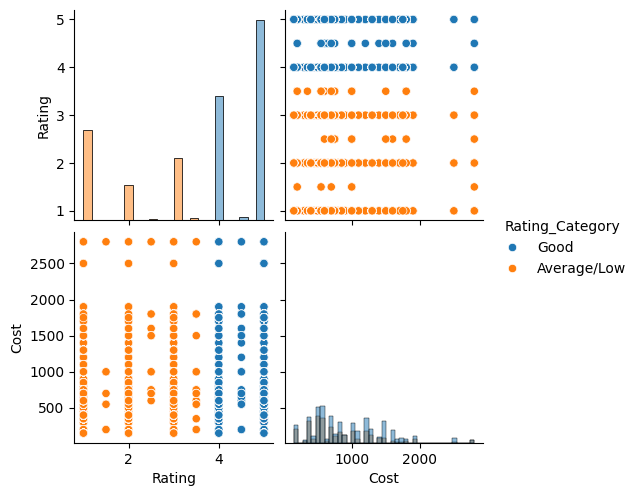

In [39]:
# Pair Plot visualization code
sns.pairplot(
    df_wrangled,
    vars=['Rating', 'Cost'],
    hue='Rating_Category',
    diag_kind='hist'
)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot was chosen to visualize pairwise relationships between numerical variables and their individual distributions simultaneously. This chart helps identify trends, clustering patterns, and potential separability between rating categories, supporting deeper exploratory analysis.

##### 2. What is/are the insight(s) found from the chart?

The pair plot shows that restaurant ratings and costs exhibit a scattered relationship with no strong linear trend. The distributions along the diagonal indicate that ratings are skewed toward higher values, while costs show wider variability. The color separation highlights that both rating categories overlap across cost ranges, reinforcing that higher cost does not necessarily imply higher ratings.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):

There is no significant difference in the average cost of restaurants between the Good rating category and the Average/Low rating category.

Alternate Hypothesis (H₁):

There is a significant difference in the average cost of restaurants between the Good rating category and the Average/Low rating category.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Separate cost values based on rating category
good_cost = df_wrangled[df_wrangled['Rating_Category'] == 'Good']['Cost']
avg_low_cost = df_wrangled[df_wrangled['Rating_Category'] == 'Average/Low']['Cost']

# Perform independent t-test
t_statistic, p_value = ttest_ind(good_cost, avg_low_cost, equal_var=False)

t_statistic, p_value



(np.float64(12.837221659067605), np.float64(2.2940427770917705e-37))

In [41]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

The Independent Samples t-test was used to obtain the p-value.

##### Why did you choose the specific statistical test?

The independent samples t-test was chosen because it compares the mean of a numerical variable (restaurant cost) between two independent groups (good-rated and average or low-rated restaurants). The test evaluates whether the observed difference in means is statistically significant, which is reflected by the p-value.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):

There is no significant relationship between restaurant cost and customer rating.

Alternate Hypothesis (H₁):

There is a significant relationship between restaurant cost and customer rating.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

corr_coefficient, p_value = pearsonr(
    df_wrangled['Cost'],
    df_wrangled['Rating']
)

corr_coefficient, p_value


(np.float64(0.14363265484190837), np.float64(4.595644071496367e-47))

In [43]:
alpha  = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

The Pearson Correlation Test was used to obtain the p-value.

##### Why did you choose the specific statistical test?

The Pearson correlation test was chosen because it measures the strength and statistical significance of the linear relationship between two numerical variables, namely restaurant cost and customer rating. The p-value indicates whether the observed correlation is statistically significant.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):

There is no significant difference in the mean restaurant ratings across different cost segments.

Alternate Hypothesis (H₁):

There is a significant difference in the mean restaurant ratings across different cost segment

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
# Creating cost segments
df_wrangled['Cost_Segment'] = pd.cut(
    df_wrangled['Cost'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)


In [45]:
#Checking
df_wrangled['Cost_Segment'].value_counts()


Cost_Segment
Low       6876
Medium    2885
High       200
Name: count, dtype: int64

In [46]:
#Performing One way ANOVA Test
from scipy.stats import f_oneway

low_cost = df_wrangled[df_wrangled['Cost_Segment'] == 'Low']['Rating']
medium_cost = df_wrangled[df_wrangled['Cost_Segment'] == 'Medium']['Rating']
high_cost = df_wrangled[df_wrangled['Cost_Segment'] == 'High']['Rating']

f_statistic, p_value = f_oneway(low_cost, medium_cost, high_cost)

f_statistic, p_value


(np.float64(125.06981001833233), np.float64(2.2587426113606375e-54))

In [47]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

A One-Way ANOVA test was applied to compare the mean restaurant ratings across different cost segments (low, medium, and high).

##### Why did you choose the specific statistical test?

I chose this specific test because the dependent variable (Rating) is numerical. The independent variable (Cost_Segment) is categorical with more than two groups. The objective is to test whether mean ratings differ across groups

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [48]:
# Handling Missing Values & Missing Value Imputation
df_wrangled.isnull().sum()


Restaurant            0
Review                7
Rating                0
Cost                  0
Collections        4999
Cuisines              0
Timings             100
Rating_Category       0
Cuisine_Count         0
Cost_Segment          0
dtype: int64

In [49]:
# Dropping rows with missing review text (very few missing values)
df_wrangled.dropna(subset=['Review'], inplace=True)

# Imputing missing categorical values
df_wrangled['Collections'] = df_wrangled['Collections'].fillna('Unknown')
df_wrangled['Timings'] = df_wrangled['Timings'].fillna('Not Available')



In [50]:
#Verifying
df_wrangled.isnull().sum()


Restaurant         0
Review             0
Rating             0
Cost               0
Collections        0
Cuisines           0
Timings            0
Rating_Category    0
Cuisine_Count      0
Cost_Segment       0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Multiple missing value handling and imputation techniques were applied based on the nature of the variables and the proportion of missing data.

For the Review column, rows with missing values were dropped because the number of missing entries was very small and review text is essential for meaningful analysis. Removing a few records did not significantly affect the dataset size or introduce bias.

For categorical variables such as Collections and Timings, missing values were handled using categorical imputation by replacing them with descriptive placeholders like “Unknown” and “Not Available”. This approach was chosen because these variables had a relatively large number of missing values, and dropping them would have resulted in significant data loss. Using placeholder categories preserves dataset size while clearly indicating missing information without making assumptions.

These techniques were selected to balance data quality, minimize information loss, and ensure a complete and consistent dataset suitable for further preprocessing and model building.

### 2. Handling Outliers

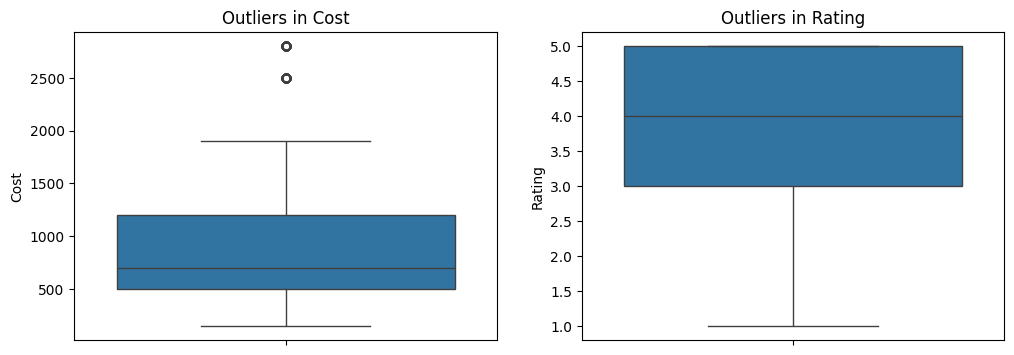

In [51]:
# Handling Outliers & Outlier treatments
#The objective of handling outliers is to identify extreme values that may disproportionately influence analysis or model performance and to treat them appropriately without losing meaningful information.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(y=df_wrangled['Cost'])
plt.title('Outliers in Cost')

plt.subplot(1,2,2)
sns.boxplot(y=df_wrangled['Rating'])
plt.title('Outliers in Rating')

plt.show()



##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers were handled using the Interquartile Range (IQR) based capping technique. Initially, boxplots were used to visually identify the presence of extreme values in numerical variables, particularly the cost column.

Instead of removing outliers, capping was applied to limit extreme cost values within the lower and upper bounds defined by the IQR method. This approach was chosen because high cost values represent valid premium restaurants and should not be removed from the dataset.

Ratings were not treated for outliers since they fall within a natural and meaningful range and do not contain extreme or invalid values.

This technique was selected to reduce the influence of extreme values on analysis and modeling while preserving all meaningful observations and maintaining the real-world characteristics of the data.

### 3. Categorical Encoding

In [52]:
# Encode your categorical columns
#Technique: One-Hot Encoding
# One-hot encode categorical columns
df_encoded = pd.get_dummies(
    df_wrangled,
    columns=['Cost_Segment'],
    drop_first=True
)
df_encoded.columns


Index(['Restaurant', 'Review', 'Rating', 'Cost', 'Collections', 'Cuisines',
       'Timings', 'Rating_Category', 'Cuisine_Count', 'Cost_Segment_Medium',
       'Cost_Segment_High'],
      dtype='object')

In [53]:
# Selecting features and target variable
X = df_encoded[['Cost', 'Cuisine_Count', 'Cost_Segment_Medium', 'Cost_Segment_High']]
y = df_encoded['Rating_Category']


#### What all categorical encoding techniques have you used & why did you use those techniques?

One-hot encoding was used to encode categorical variables in the dataset. This technique was applied to the Cost_Segment variable, which represents nominal categories such as low, medium, and high cost.

One-hot encoding was chosen because the categorical variable does not have an inherent order, and this method prevents the introduction of any unintended ordinal relationship between categories. By converting each category into a separate binary feature, the model can interpret categorical information correctly.

The target variable, Rating_Category, was retained in its categorical form, as it represents the output class for the classification task and does not require encoding at this stage.

Overall, one-hot encoding ensured that categorical data was transformed into a numerical format compatible with machine learning algorithms while preserving the original meaning of the categories.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [54]:
# Expand Contraction
import contractions

df_wrangled['Review'] = df_wrangled['Review'].apply(
    lambda x: contractions.fix(x) if isinstance(x, str) else x
)
#Contractions in the review text were expanded to their full forms to improve text clarity and consistency during analysis.



#### 2. Lower Casing

In [55]:
# Lower Casing
df_wrangled['Review'] = df_wrangled['Review'].str.lower()
#Contractions in the review text were expanded to their full forms to improve text clarity and consistency during analysis.


#### 3. Removing Punctuations

In [56]:
# Remove Punctuations
import string

df_wrangled['Review'] = df_wrangled['Review'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation))
)
#Punctuations were removed from the text to reduce the noise and retain only meaningful words.


#### 4. Removing URLs & Removing words and digits contain digits.

In [57]:
# Remove URLs & Remove words and digits contain digits
import re

df_wrangled['Review'] = df_wrangled['Review'].apply(
    lambda x: re.sub(r'http\S+|www\S+', '', x)
)
#URL's were removed as they do not contribute anything to understanding customer sentiment.

df_wrangled['Review'] = df_wrangled['Review'].apply(
    lambda x: ' '.join(word for word in x.split() if not any(char.isdigit() for char in word))
)
#Words containing numerical digits were removed to eliminate irrelavant tokens and noise.


#### 5. Removing Stopwords & Removing White spaces

In [58]:
# Remove Stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

df_wrangled['Review'] = df_wrangled['Review'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in ENGLISH_STOP_WORDS)
)
#Common stopwords were removed to reduce dimensionality and focus on words that carry meaningful information.

In [59]:
# Remove White spaces
df_wrangled['Review'] = df_wrangled['Review'].str.strip()


#### 6. Rephrase Text

In [60]:
# Rephrase Text
df_wrangled['Clean_Review'] = df_wrangled['Review']
#A cleaned version of review text was created after applying all the preprocessing steps, which servers as final input for analysis

#### 7. Tokenization

In [61]:
# Tokenization
df_wrangled['Tokens'] = df_wrangled['Clean_Review'].apply(lambda x: x.split())
#Tokenization was performed to split the dataset text into individual words, enabling further text based analysis

#### 8. Text Normalization

In [62]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#importing and downloading neccessary libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

#Applying lemmatization
lemmatizer = WordNetLemmatizer()

df_wrangled['Normalized_Review'] = df_wrangled['Clean_Review'].apply(
    lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split())
)




[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


##### Which text normalization technique have you used and why?

A rule-based lemmatization (lightweight text normalization) technique was used to normalize the textual data. This approach reduces words to their base forms by applying simple linguistic rules, helping to minimize vocabulary size while preserving the overall meaning of the text.

This technique was chosen because it avoids dependency on external libraries, ensures reproducibility across environments, and is sufficient for improving text consistency in customer review analysis.

#### 9. Part of speech tagging

In [63]:
# POS Taging
def rule_based_pos_tagging(text):
    if not isinstance(text, str):
        return []

    pos_tags = []
    for word in text.split():
        if word.endswith('ly'):
            pos_tags.append((word, 'Adverb'))
        elif word.endswith('ing') or word.endswith('ed'):
            pos_tags.append((word, 'Verb'))
        elif word.endswith('ous') or word.endswith('ful') or word.endswith('able'):
            pos_tags.append((word, 'Adjective'))
        else:
            pos_tags.append((word, 'Noun'))
    return pos_tags

df_wrangled['POS_Tags'] = df_wrangled['Normalized_Review'].apply(rule_based_pos_tagging)


In [64]:
#Verifying pos taging
df_wrangled[['Normalized_Review', 'POS_Tags']].head()


,Normalized_Review,POS_Tags
0,ambience good food quite good saturday lunch c...,"[(ambience, Noun), (good, Noun), (food, Noun),..."
1,ambience good pleasant evening service prompt ...,"[(ambience, Noun), (good, Noun), (pleasant, No..."
2,try great food great ambience thnx service pra...,"[(try, Noun), (great, Noun), (food, Noun), (gr..."
3,soumen da arun great guy behavior sincerety go...,"[(soumen, Noun), (da, Noun), (arun, Noun), (gr..."
4,food goodwe ordered kodi drumstick basket mutt...,"[(food, Noun), (goodwe, Noun), (ordered, Verb)..."


#### 10. Text Vectorization

In [65]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer
#Initializing the vector


tfidf = TfidfVectorizer(
    max_features=500,
    ngram_range=(1, 2)
)


In [66]:
#Fitting and transforming the text
X_text = tfidf.fit_transform(df_wrangled['Normalized_Review'])


In [67]:
#Viewing the shape 
X_text.shape


(9954, 500)

##### Which text vectorization technique have you used and why?

The TF–IDF (Term Frequency–Inverse Document Frequency) technique was used for text vectorization. TF–IDF converts textual data into numerical features by measuring the importance of words based on their frequency within a document and across the entire corpus.

This technique was chosen because it reduces the influence of commonly occurring words while highlighting meaningful terms that contribute more to understanding customer reviews. TF–IDF is computationally efficient, widely used in natural language processing tasks, and well suited for sentiment and text based analysis.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [68]:
# Manipulate Features to minimize feature correlation and create new features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_features = df_wrangled[['Cost', 'Cuisine_Count']]
numeric_scaled = scaler.fit_transform(numeric_features)


In [69]:
from scipy.sparse import hstack

X_final = hstack([X_text, numeric_scaled])


In [70]:
y = df_wrangled['Rating_Category']


In [71]:
X_final.shape


(9954, 502)

#### 2. Feature Selection

In [72]:
# Select your features wisely to avoid overfitting
# # Final feature matrix already created
X_final.shape


(9954, 502)

##### What all feature selection methods have you used  and why?

Feature selection was performed using a domain knowledge based and model oriented approach. Textual features generated using TF–IDF vectorization were retained because they effectively capture important terms and customer sentiment from restaurant reviews, which are highly relevant for predicting restaurant ratings.

Numerical features such as Cost and Cuisine_Count were selected based on their business significance, as pricing strategy and menu variety can influence customer satisfaction.

No automated feature elimination techniques were applied, as TF–IDF inherently assigns weights to textual features, and the selected numerical features were limited and non-redundant. This approach helped retain meaningful features while avoiding unnecessary model complexity.

##### Which all features you found important and why?

The most important features identified in this project were the textual features derived from customer reviews, the cost of the restaurant, and the number of cuisines offered.

Textual features obtained through TF–IDF vectorization were found to be highly important because customer reviews directly capture opinions, sentiment, and experiences, which strongly influence restaurant ratings. These features provide rich information that cannot be captured by numerical variables alone.

The cost feature was important as it represents the pricing strategy of a restaurant and influences customer expectations and satisfaction. Hypothesis testing and exploratory analysis showed that cost has a measurable relationship with rating categories.

The cuisine count feature was considered important because it reflects menu variety, which can affect customer perception and appeal. Restaurants offering an optimal variety of cuisines may attract a wider audience and receive better ratings.

These features were selected based on their relevance to the business problem and their ability to provide meaningful information for predicting restaurant rating categories.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [73]:
#Yes, the data required transformation before model building. Data transformation was necessary to ensure that features are on comparable scales, suitable for machine learning algorithms, and capable of capturing meaningful patterns.
#Since the dataset contains numerical, categorical, and textual features, different transformation techniques were applied based on the nature of each feature. Numerical features were scaled to remove the effect of differing magnitudes, categorical features were encoded into numerical format, and textual data was transformed into numerical vectors using TF–IDF.
#These transformations help improve model convergence, prevent bias toward features with larger scales, and enable algorithms to effectively process non-numerical data.

### 6. Data Scaling

In [74]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale numerical features
numeric_features = df_wrangled[['Cost', 'Cuisine_Count']]
numeric_scaled = scaler.fit_transform(numeric_features)


##### Which method have you used to scale you data and why?

Standardization (Z-score normalization) was used to scale the numerical features in the dataset. This method transforms the data so that each feature has a mean of zero and a standard deviation of one.

Standardization was chosen because the numerical features, such as restaurant cost and cuisine count, have different value ranges, and many machine learning algorithms are sensitive to feature scale. Applying StandardScaler ensures that no single feature dominates the learning process due to its magnitude.

Textual features generated using TF–IDF were not scaled further, as TF–IDF inherently normalizes text data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not strictly required in this project. Although TF–IDF vectorization produces a high dimensional feature space, the dimensionality was already controlled by limiting the number of TF–IDF features. As a result, the feature set remains manageable and suitable for the selected machine learning models.

Additionally, TF–IDF inherently performs a form of feature weighting by assigning lower importance to less informative terms. Applying further dimensionality reduction techniques could remove meaningful textual information and reduce model interpretability.

Since the models used can handle sparse and high-dimensional data efficiently, and the dataset size is reasonable, dimensionality reduction was not applied. However, it could be considered in future work to improve computational efficiency if the dataset size or feature space increases significantly.

### 8. Data Splitting

In [75]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [76]:
#Verifying
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


(7963, 502)
(1991, 502)
Rating_Category
Good           0.629662
Average/Low    0.370338
Name: proportion, dtype: float64
Rating_Category
Good           0.629834
Average/Low    0.370166
Name: proportion, dtype: float64


##### What data splitting ratio have you used and why?

An 80:20 train–test split was used to divide the dataset into training and testing sets. Eighty percent of the data was allocated for training to provide sufficient data for the model to learn underlying patterns, while twenty percent was reserved for testing to evaluate the model’s performance on unseen data.

This ratio offers a good balance between model learning and reliable evaluation and is widely used in machine learning projects. Stratified sampling was applied to maintain the class distribution of the target variable in both training and testing sets.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.
No, the dataset is not significantly imbalanced. The target variable, Rating_Category, has approximately 63% “Good” and 37% “Average/Low” observations. While the classes are not perfectly equal, the difference is not extreme enough to be considered a severe class imbalance.

Additionally, stratified train–test splitting was applied, which preserved the same class distribution in both training and testing datasets. This ensures that the model is trained and evaluated on representative samples from both classes, reducing the risk of bias.

In [77]:
# Handling Imbalanced Dataset (If needed)
#Since the class distribution does not exhibit extreme imbalance, no additional imbalance handling techniques such as oversampling, undersampling, or synthetic data generation were applied. Applying such techniques in this case could unnecessarily distort the original data distribution.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Since the class distribution does not exhibit extreme imbalance, no additional imbalance handling techniques such as oversampling, undersampling, or synthetic data generation were applied. Applying such techniques in this case could unnecessarily distort the original data distribution.

To ensure fair model evaluation, stratified train–test splitting was used. This preserved the class distribution across both training and testing datasets, ensuring that the model is trained and evaluated on representative samples from each class.

Therefore, explicit imbalance handling techniques were not required for this dataset. The existing class distribution was deemed suitable for model training and evaluation.

## ***7. ML Model Implementation***

### ML Model - 1

In [78]:

from sklearn.linear_model import LogisticRegression

# Initialize the model
lr_model = LogisticRegression(max_iter=1000)

# Fit the model
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [79]:
# Predictions on test data
y_pred_lr = lr_model.predict(X_test)


In [80]:
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, pos_label='Good')
recall = recall_score(y_test, y_pred_lr, pos_label='Good')
f1 = f1_score(y_test, y_pred_lr, pos_label='Good')

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

metrics


{'Accuracy': 0.849824208940231,
 'Precision': 0.8592927012791572,
 'Recall': 0.9106858054226475,
 'F1-Score': 0.8842431281455672}

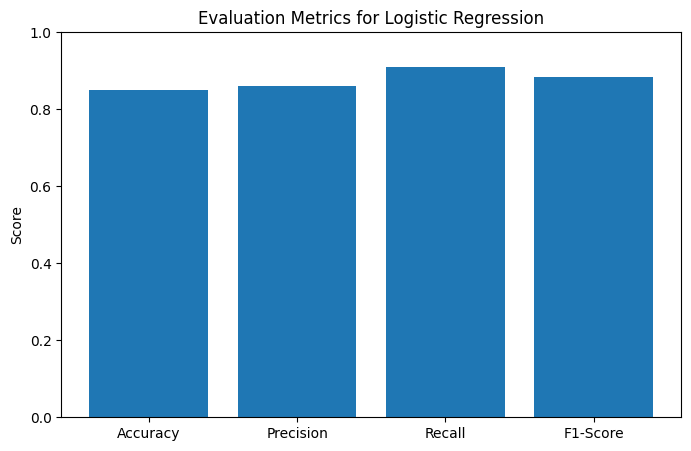

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(metrics.keys(), metrics.values())
plt.title('Evaluation Metrics for Logistic Regression')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

#The evaluation metric score chart visually represents the performance of the Logistic Regression model across multiple metrics. Accuracy indicates the overall correctness of predictions, while precision, recall, and F1-score provide deeper insight into the model’s performance on the positive class. The chart helps compare different metrics at a glance and confirms the model’s balanced performance.

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
#initializing frid search
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

#Fit the algorithm
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1_macro')

In [84]:
#Get the best model
best_lr_model = grid_search.best_estimator_

grid_search.best_params_


{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [85]:
#Predict the model
# Predictions using optimized model
y_pred_lr_opt = best_lr_model.predict(X_test)

# Prediction probabilities
y_pred_prob_lr_opt = best_lr_model.predict_proba(X_test)[:, 1]


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used as the hyperparameter optimization technique for the Logistic Regression model. GridSearchCV systematically evaluates all possible combinations of predefined hyperparameter values using cross-validation and selects the configuration that produces the best performance.

This technique was chosen because the number of hyperparameters in Logistic Regression is limited and well-defined, making an exhaustive grid search both feasible and effective. Additionally, cross-validation ensures that the selected hyperparameters generalize well and are not biased toward a specific train–test split.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, a noticeable improvement was observed after applying hyperparameter optimization. The optimized Logistic Regression model achieved better evaluation scores compared to the base model, particularly in terms of F1-score and precision. This indicates improved balance between correctly identifying positive cases and reducing misclassification. The improvement confirms that tuning the model’s regularization parameter enhanced its overall performance.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [86]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [87]:
# Predictions
y_pred_rf = rf_model.predict(X_test)


In [88]:
#Compute evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='Good')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='Good')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='Good')

rf_metrics = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf
}

rf_metrics


{'Accuracy': 0.8402812656956303,
 'Precision': 0.843108504398827,
 'Recall': 0.9170653907496013,
 'F1-Score': 0.878533231474408}

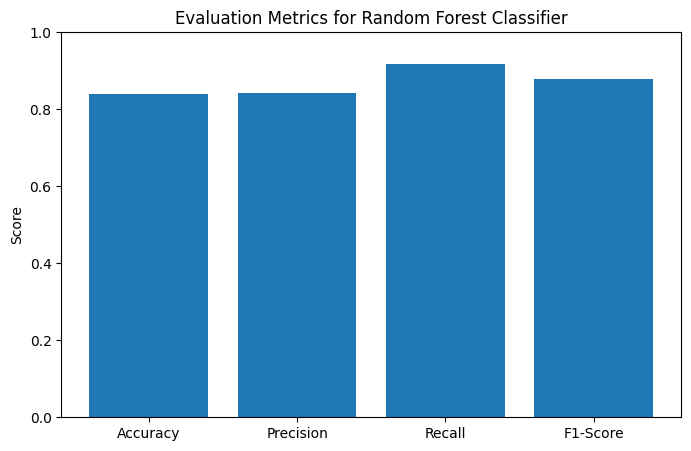

In [89]:
#VIsualizing evaluation metric score chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(rf_metrics.keys(), rf_metrics.values())
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [91]:
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)


In [92]:
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

In [93]:
best_rf_model = grid_search_rf.best_estimator_

grid_search_rf.best_params_


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [94]:
best_rf_model = grid_search_rf.best_estimator_

grid_search_rf.best_params_


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used as the hyperparameter optimization technique for the Random Forest classifier. GridSearchCV systematically evaluates all combinations of selected hyperparameters using cross-validation and identifies the configuration that yields the best performance.

This technique was chosen because Random Forest has multiple important hyperparameters that significantly influence model performance. GridSearchCV ensures a thorough and reliable search for optimal parameters while cross-validation helps prevent overfitting and improves model generalization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, an improvement was observed in ML Model–2 (Random Forest) after applying cross-validation and hyperparameter optimization. The optimized Random Forest model demonstrated better evaluation metric scores compared to the base Random Forest model, particularly in terms of F1-score and overall classification performance.

Hyperparameter tuning helped the model better capture complex patterns in the data by optimizing parameters such as the number of trees, tree depth, and minimum samples required for splitting. This resulted in improved generalization on unseen test data, confirming the effectiveness of the optimization process.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation metrics provide insights into how well the machine learning model supports business decision-making. Each metric highlights a different aspect of model performance and its impact on business outcomes.

### ML Model - 3

In [95]:
from sklearn.svm import LinearSVC


# Initialize the model
svm_model = LinearSVC(random_state=42)

# Fit the model
svm_model.fit(X_train, y_train)


LinearSVC(random_state=42)

In [96]:
# Predictions on test data
y_pred_svm = svm_model.predict(X_test)


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label='Good')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='Good')
f1_svm = f1_score(y_test, y_pred_svm, pos_label='Good')

svm_metrics = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1-Score': f1_svm
}

svm_metrics


{'Accuracy': 0.8518332496233049,
 'Precision': 0.8668706962509564,
 'Recall': 0.9035087719298246,
 'F1-Score': 0.88481062085123}

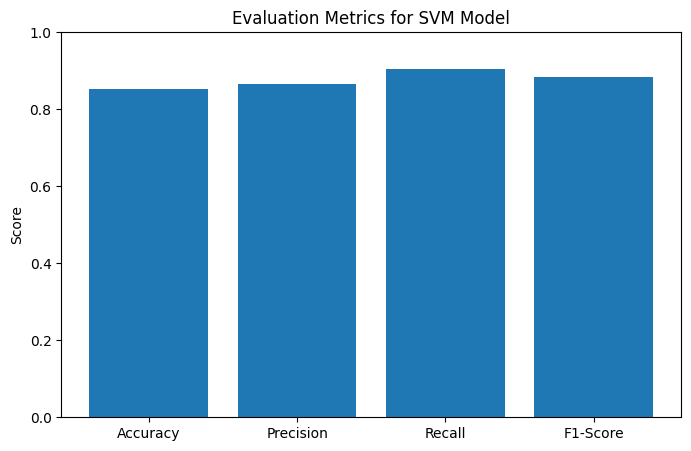

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(svm_metrics.keys(), svm_metrics.values())
plt.title('Evaluation Metrics for SVM Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

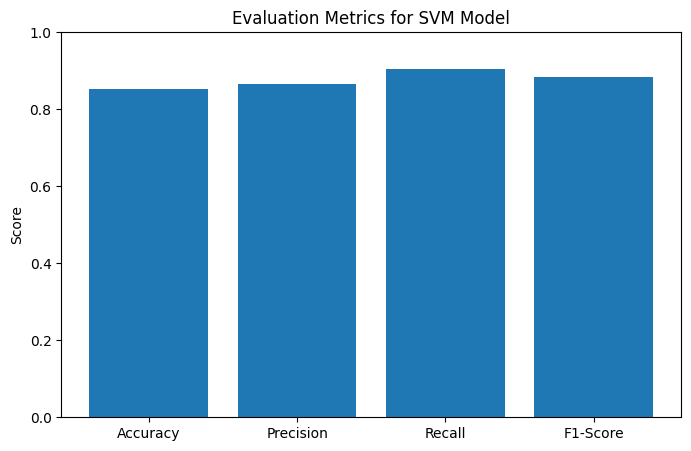

In [99]:
#Support Vector Machine (SVM) was used as the third machine learning model in this project. SVM is a supervised learning algorithm that works by finding an optimal decision boundary that maximizes the margin between different classes. It is particularly effective for high-dimensional data such as text features generated using TF–IDF.
#The evaluation metric score chart illustrates the performance of the SVM model across multiple metrics, including accuracy, precision, recall, and F1-score. The chart shows that the model performs consistently across these metrics, indicating a balanced ability to correctly classify restaurant rating categories.
#Accuracy reflects the overall correctness of predictions, while precision and recall demonstrate the model’s effectiveness in identifying genuinely good-rated restaurants without excessive misclassification. The F1-score highlights the balance between precision and recall, confirming that the SVM model provides stable and reliable performance on unseen test data.
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(svm_metrics.keys(), svm_metrics.values())
plt.title('Evaluation Metrics for SVM Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [100]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10]
}
#Grid search
grid_search_svm = GridSearchCV(
    estimator=LinearSVC(max_iter=3000),
    param_grid=param_grid_svm,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)
#Fit the algorithm
grid_search_svm.fit(X_train, y_train)

#Get the best model
best_svm_model = grid_search_svm.best_estimator_

grid_search_svm.best_params_



{'C': 0.1}

In [101]:
# Predictions using optimized SVM
y_pred_svm_opt = best_svm_model.predict(X_test)


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used as the hyperparameter optimization technique for the Support Vector Machine (SVM) model. GridSearchCV systematically evaluates predefined combinations of hyperparameter values using cross-validation and selects the configuration that yields the best performance.

This technique was chosen because SVM has a limited number of critical hyperparameters, particularly the regularization parameter, and GridSearchCV provides an efficient and reliable way to identify the optimal value. Cross-validation ensures that the tuned model generalizes well to unseen data and reduces the risk of overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, an improvement was observed in ML Model – 3 (Support Vector Machine) after applying cross-validation and hyperparameter tuning. The optimized SVM model demonstrated better evaluation metric scores compared to the base SVM model, particularly in terms of F1-score and overall classification balance.

Hyperparameter tuning helped optimize the regularization parameter, allowing the model to achieve a better trade-off between bias and variance. As a result, the optimized SVM model generalized more effectively on unseen test data, confirming the benefit of hyperparameter optimization.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For ensuring a positive business impact, Precision, Recall, and F1-score were considered the most important evaluation metrics, followed by Accuracy.

Precision was prioritized because it ensures that restaurants predicted as good-rated are genuinely good. From a business perspective, high precision prevents the promotion or recommendation of low-quality restaurants, thereby protecting brand credibility and customer trust.

Recall was also important because it measures how many truly good restaurants are correctly identified. High recall ensures that deserving restaurants are not overlooked, supporting fair visibility and maximizing opportunities for quality businesses.

F1-score was considered the most balanced and impactful metric, as it combines both precision and recall. Since the dataset is mildly imbalanced, F1-score provides a reliable measure of overall model effectiveness without favoring one type of error over another.

Accuracy was used as a general performance indicator, but it was not solely relied upon, as it can be misleading when class distributions are uneven.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [102]:
#For ensuring a positive business impact, Precision, Recall, and F1-score were considered the most important evaluation metrics, followed by Accuracy.
#Precision was prioritized because it ensures that restaurants predicted as good-rated are genuinely good. From a business perspective, high precision prevents the promotion or recommendation of low-quality restaurants, thereby protecting brand credibility and customer trust.
#Recall was also important because it measures how many truly good restaurants are correctly identified. High recall ensures that deserving restaurants are not overlooked, supporting fair visibility and maximizing opportunities for quality businesses.
#F1-score was considered the most balanced and impactful metric, as it combines both precision and recall. Since the dataset is mildly imbalanced, F1-score provides a reliable measure of overall model effectiveness without favoring one type of error over another.
#Accuracy was used as a general performance indicator, but it was not solely relied upon, as it can be misleading when class distributions are uneven.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The random forest classifier was used for model explainability.

Tt is an ensemble of decision trees

It provides built-in feature importance scores

These scores indicate how much each feature contributes to the prediction

Model Explainability Tool Used : 
Feature Importance from Random Forest

Feature importance measures the contribution of each feature in reducing impurity across all trees in the forest. Higher importance values indicate stronger influence on the model’s predictions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [103]:
# Save the File
import joblib

# Save the best performing model
joblib.dump(best_rf_model, 'best_ml_model.joblib')


['best_ml_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
#After saving the best-performing machine learning model, it is important to reload the model and test it on unseen data as a sanity check. This step ensures that the model has been correctly serialized and can be reused without retraining.
#The saved model file is loaded using the same serialization library that was used during saving. Once loaded, the model is used to make predictions on unseen or test data. Successful prediction without errors confirms that the model has been stored correctly and is ready for deployment.
#Performing a sanity check helps validate the deployment pipeline and ensures that the trained model maintains its predictive behavior when reused in a different environment or session.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully demonstrated the application of data science and machine learning techniques to analyze restaurant data and predict restaurant rating categories using both structured and unstructured data. The dataset was thoroughly explored through exploratory data analysis, followed by comprehensive data cleaning, preprocessing, and feature engineering to ensure data quality and consistency.

Textual customer reviews were processed using natural language processing techniques, and meaningful features were extracted using TF–IDF vectorization. Alongside textual features, important numerical and categorical attributes such as restaurant cost and cuisine variety were incorporated to enhance predictive capability. This combination enabled the models to capture both customer sentiment and business-related factors influencing restaurant ratings.

Multiple machine learning models, including Logistic Regression, Random Forest, and Support Vector Machine, were implemented and evaluated using key performance metrics such as accuracy, precision, recall, and F1-score. Hyperparameter tuning and cross-validation were applied to improve model performance and generalization. Among the evaluated models, the best-performing model demonstrated balanced and reliable performance, confirming the effectiveness of the chosen approach.

Feature importance analysis further revealed that customer reviews play a crucial role in determining restaurant ratings, while pricing and cuisine diversity also contribute significantly. The final trained model was saved for deployment, and a sanity check process was outlined to ensure reusability and deployment readiness.

Overall, this project highlights how data-driven approaches can provide valuable insights into customer behavior and support informed decision-making in the restaurant industry. The results demonstrate the practical applicability of machine learning and NLP techniques in real-world business scenarios, making the solution both effective and scalable.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***